In [13]:
import numpy as np

def rule_metrics(rule, tokened_text, metrics):
    '''
    Args:
        rule: set of word cluster
        tokened_text: 2D list of tokened text
        metrics: 1D ndarray of TEDTalk metric
    Return:
        rule_metric: 1D ndarray of metrics of TEDTalks with titles that contain the rule
    '''
    rule_mask = np.empty(len(tokened_text), dtype=bool)
    for j, title in enumerate(tokened_text):
        rule_mask[j] = rule.issubset(set(title))
    rule_metric = metrics[rule_mask]
    return rule_metric

In [14]:
from apyori import apriori

def extract_rules(tokened_text, sthresh, cthresh):
    '''
    Args:
        tokened_text: 2D list of tokened text
        sthresh: support threshold for association rule mining
        cthresh: confidence threshold for association rule mining
    Return:
        rules: list of rules (sets of words)
        support: list of rule support
        confidence: list of rule confidence
    '''
    results = list(apriori(tokened_text, min_support = sthresh, min_confidence = cthresh))
    rules = []
    support = []
    confidence = []

    for i, rule in enumerate(results):
        words = rule.items
        rules.append(words)
        support.append(rule.support)
        confidence.append(rule.ordered_statistics[0].confidence)

    return rules, support, confidence

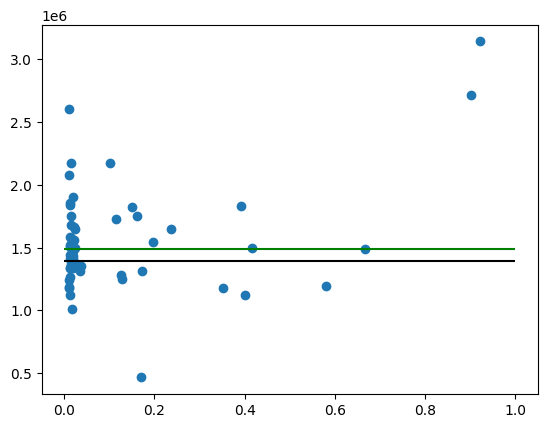

In [18]:
# Need to process text?
process_text = True

%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
if process_text:
    from text_processing import process_text

data = pd.read_csv('data/dropna_processed.csv')
titles = data['title'].values

data = pd.read_csv('data/date_popularity_processed.csv')
popularity = data['popularity'].values
likes = data['likes'].values
views = data['views'].values

title_tokens = []
if process_text:
    for title in titles:
        title_tokens.append(process_text(str(title)).split(' '))
else:
    for title in titles:
        title_tokens.append(str(title).split(' '))

rules, support, confidence = extract_rules(title_tokens, 0.002, 0.01)

med_rule_views = np.empty_like(support)
for i, rule in enumerate(rules):
    med_rule_views[i] = np.median(rule_metrics(rule, title_tokens, views))

plt.scatter(confidence, med_rule_views)
plt.hlines(np.median(views), 0, 1, colors='black')
plt.hlines(np.median(med_rule_views), 0, 1, colors='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x27775da7b30>,
 'caps': [<matplotlib.lines.Line2D at 0x27775df8140>,
 'boxes': [<matplotlib.lines.Line2D at 0x27775da7890>],
 'medians': [<matplotlib.lines.Line2D at 0x27775df8710>],
 'fliers': [<matplotlib.lines.Line2D at 0x27775df8a10>],
 'means': []}

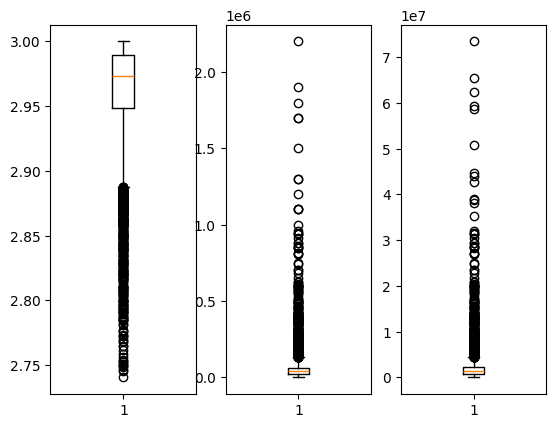

In [2]:
plt.subplot(1, 3, 1)
plt.boxplot(popularity)
plt.subplot(1, 3, 2)
plt.boxplot(likes)
plt.subplot(1, 3, 3)
plt.boxplot(views)